<a href="https://www.kaggle.com/code/asmaaadel39/iris-flower-classification?scriptVersionId=109101343" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Description of Project 
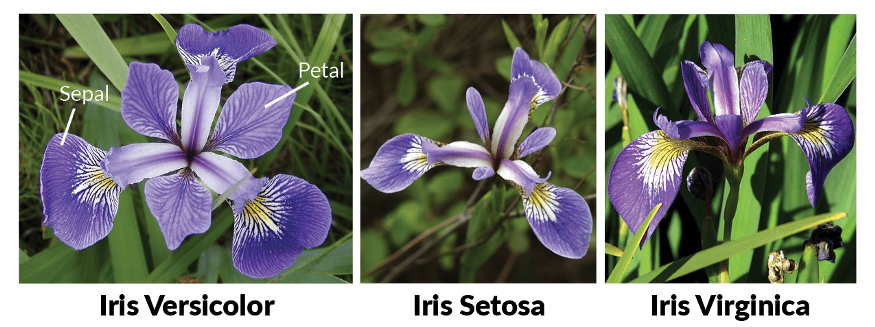


In This Project am going to use **supervised ML algorithm** to make **classification using Decision Tree algorithm.**
**Description of Dataset:**
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
Predicted attribute: class of iris plant.
**Attribute Information:**
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica


# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

# Using Pandas for Data Manipulation


In [ ]:
# Read iris data
df=pd.read_csv('../input/iris/Iris.csv') 
df.head()

In [ ]:
#The info() method prints information about the DataFrame. 
#The information contains the number of columns, column labels, 
#column data types, memory usage, range index,and the number of cells in each column (non-null values)
df.info()

In [ ]:
# The describe() method returns statistical information about the data, its mean, standard 
# and standard deviation ...etc
df.describe()

In [ ]:
# isnull() method is checking if there's any missing value 
#df.isnull() 
df.isnull().sum().plot(kind='bar')
plt.show()
# I choose to plot the missing values

In [ ]:
# Our target variable is "Species" we can see how many classes we have by visualizing 
# the species variable 
Species=df.Species.value_counts()
Species

In [ ]:
# Converting the array of species into list 
listt=df.Species.unique().tolist()
listt

**** Visualizing how many speices we have****

In [ ]:
plt.pie(Species,labels=listt)
plt.title("How Many Speices",fontsize=22,color='blue')
plt.show()

**Figuring out all the relationships of all features between each other**

In [ ]:
# Drop the id column 
data=df.drop('Id',axis=1)
plot=sns.pairplot(data, hue='Species', size=2.5)
plot.fig.suptitle("Relationship of all features between each other",fontsize=22)
plt.show()

# Applying the Decision Tree algorithm


In [ ]:
features=df.drop(["Species","Id"],axis=1)
features

In [ ]:
target=df["Species"]
target

In [ ]:
model=tree.DecisionTreeClassifier()
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=1)
model=model.fit(features,target)
#tree.plot_tree(model)


# Visualizing the Graph of the Tree

In [ ]:
features_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']


In [ ]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("df")
dot_data = tree.export_graphviz(model, out_file=None,feature_names=features_names,
                                class_names=listt,filled=True, rounded=True, 
                                special_characters=True)
graph = graphviz.Source(dot_data) 
graph 